<a href="https://colab.research.google.com/github/Gcango/Ecommerce_Analise/blob/main/Explora%C3%A7%C3%A3o_Analise_dados_Ecomm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Este projecto de analise exploratório de dados relacionados ao Ecommerce, buscou analisar para além das situações do Ecommerce, a situação dos clientes. No decorer do Jupter Notebook, surgem diferentes questões respondidas sobre este assunto.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
dados = pd.read_csv("/content/Ecommerce Purchases")

In [5]:
dados.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [6]:
print(f"A base de dados possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

A base de dados possui 10000 linhas e 14 colunas 


In [7]:
#Exploração dos Dados

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [9]:
dados.describe().round(2)

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.00,10000.00
mean,2.341374e+15,907.22,50.35
std,2.256103e+15,1589.69,29.02
min,6.040186e+10,0.00,0.00
25%,3.056322e+13,280.00,25.15
50%,8.699942e+14,548.00,50.50
75%,4.492298e+15,816.00,75.77
max,6.012000e+15,9993.00,99.99


In [10]:
dados.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [11]:
dados.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [12]:
dados.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [13]:
#1) - Qual é o preço médio de compra?

In [14]:
preco_medio = dados['Purchase Price'].mean()
print(f"O preço médio de compra efectuado neste Ecommerce é de {preco_medio:.3f} ")

O preço médio de compra efectuado neste Ecommerce é de 50.347 


In [15]:
#2) - Neste caso, qual é o preço mais alto e o mais alto aplicado?

In [16]:
preco_alto = dados['Purchase Price'].max()
preco_baixo = dados['Purchase Price'].min()
print(f"O preço mais alto aplicado foi de {preco_alto:.3f}, e o mais baixo foi {preco_baixo:.3f} ")

O preço mais alto aplicado foi de 99.990, e o mais baixo foi 0.000 


In [17]:
#3) - Como podemos caraterizar os clientes pelo idioma?

In [18]:
idiomas = dados['Language'].value_counts()
lista_idiomas = ['Alemão - de', 'Russo - ru', 'Grego - el','Português - pt','Inglês - en','Francês - fr','Espanhol - es','Italiano - it','Mandarim - zh']
print(f"São no total {idiomas.count()} Idiomas cadastrados em nosso Ecommerce")
print(f"Podemos afirmar que estes idomas cadastrados são: \n{lista_idiomas}")
print(idiomas)

São no total 9 Idiomas cadastrados em nosso Ecommerce
Podemos afirmar que estes idomas cadastrados são: 
['Alemão - de', 'Russo - ru', 'Grego - el', 'Português - pt', 'Inglês - en', 'Francês - fr', 'Espanhol - es', 'Italiano - it', 'Mandarim - zh']
de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64


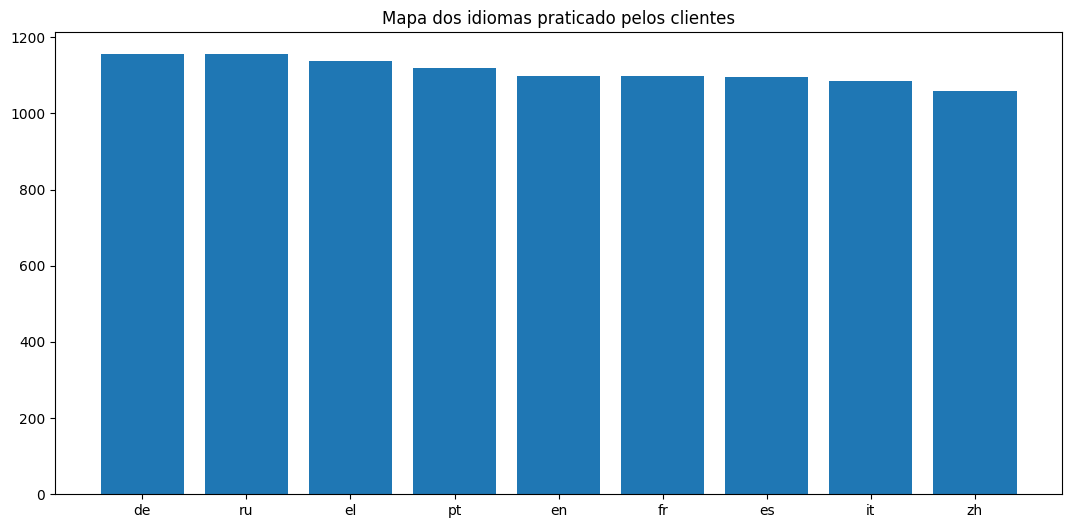

In [57]:
plt.figure(figsize=(13,6))
plt.bar(idiomas.index, idiomas.values)
#plt.xticks(rotation=90)
plt.title('Mapa dos idiomas praticado pelos clientes')
plt.show()

In [19]:
#4) - Como podemos caraterizar os clientes quanto a sua profissão?

In [56]:
profissao = dados['Job'].value_counts().head(25)
print(f"Em termos de Profissão os clientes são distribuidos em: \n{profissao}")

Em termos de Profissão os clientes são distribuidos em: 
Interior and spatial designer                                  31
Lawyer                                                         30
Social researcher                                              28
Purchasing manager                                             27
Designer, jewellery                                            27
Research officer, political party                              27
Charity fundraiser                                             26
Designer, fashion/clothing                                     26
Social worker                                                  26
Dietitian                                                      26
Special educational needs teacher                              26
Advice worker                                                  25
Psychologist, clinical                                         25
Network engineer                                               25
Radio broadcast ass

In [21]:
print(f"As profissões que mais se destacam: \n{profissao.iloc[0:6]}")

As profissões que mais se destacam: 
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Designer, jewellery                  27
Research officer, political party    27
Name: Job, dtype: int64


In [22]:
#5) - Existe alguma preferença de compra por periodo pelos Clientes?

In [23]:
periodo = dados['AM or PM'].value_counts()
print(f"Os clientes têm uma preferencia de compra no periodo de Tarde até anoitecer com {periodo[0]}.")
print(f"Já no periodo da ao começar o dia até antes do almoço a sua compra registada é de {periodo[1]}.")

Os clientes têm uma preferencia de compra no periodo de Tarde até anoitecer com 5068.
Já no periodo da ao começar o dia até antes do almoço a sua compra registada é de 4932.


In [24]:
#6) - Analisa 50 lotes existente e descreve  preço dos mesmos.

In [55]:
dados[['Lot', 'Purchase Price']].value_counts().reset_index().head(20)

,Lot,Purchase Price,0
0,00 AG,86.31,1
1,66 aO,70.26,1
2,66 YR,74.90,1
3,66 ZE,92.47,1
4,66 ZJ,25.02,1
5,66 ZS,65.96,1
6,66 Zo,30.52,1
7,66 Zr,53.90,1
8,66 aN,7.69,1
9,66 bH,38.43,1


In [26]:
#7) - Encontre o preço deste lot especifico '90 WT'.

In [27]:
preco = dados[dados["Lot"] == '90 WT']['Purchase Price']
print(f"O LOT '90 WT' tem o indice e o custo de: \n", preco)

O LOT '90 WT' tem o indice e o custo de: 
 513    75.1
Name: Purchase Price, dtype: float64


In [28]:
#8) - Encontre o cliente por email com um cartão de crédito específico nº 4926535242672853.

In [54]:
cliente = dados[dados["Credit Card"] == 4926535242672853]["Email"]
cliente

1234    bondellen@williams-garza.com
Name: Email, dtype: object

In [30]:
#9) - Faça uma analise dos Cartões de Crédito dos Clientes?

In [31]:
cc_cliente = dados['CC Provider'].value_counts().head(25)
print("Numa analise sobre o meio utilizado para o Pagamento CC, os clientes tem os seguintes provedores: ")
cc_cliente

Numa analise sobre o meio utilizado para o Pagamento CC, os clientes tem os seguintes provedores: 


JCB 16 digit                   1716
VISA 16 digit                  1715
JCB 15 digit                    868
American Express                849
Maestro                         846
Voyager                         829
Discover                        817
Mastercard                      816
VISA 13 digit                   777
Diners Club / Carte Blanche     767
Name: CC Provider, dtype: int64

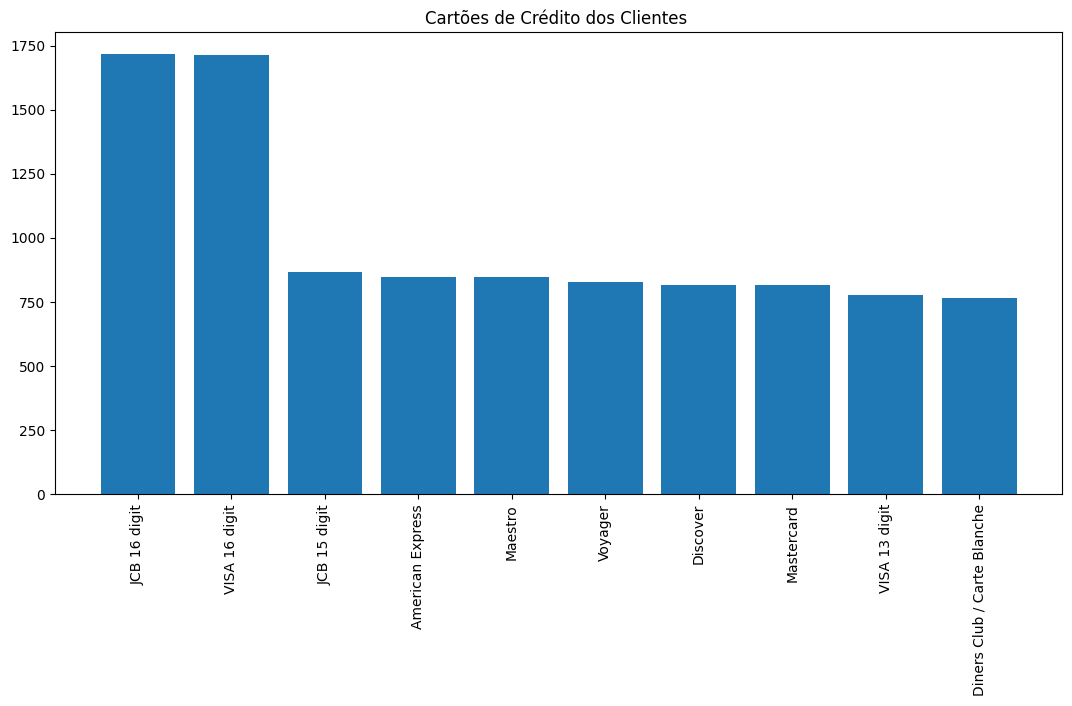

In [64]:
plt.figure(figsize=(13,6))
plt.bar(cc_cliente.index, cc_cliente.values)
plt.xticks(rotation=90)
plt.title('Cartões de Crédito dos Clientes ')
plt.show()

In [32]:
maior_compra = dados[dados['CC Provider'] == 'JCB 16 digit']['Purchase Price'].max()
menor_compra = dados[dados['CC Provider'] == 'JCB 16 digit']['Purchase Price'].min()
compra_90 = len(dados[(dados['CC Provider'] == 'JCB 16 digit') & (dados['Purchase Price'] > 90)].index)
compra_visa_90 = len(dados[(dados['CC Provider'] == 'VISA 16 digit') & (dados['Purchase Price'] > 90)].index)
compra_AE_90 = len(dados[(dados['CC Provider'] == 'American Express') & (dados['Purchase Price'] > 90)].index)

In [33]:
print(f"A maior compra em U$D efectuada com (JCB 16 digit) {maior_compra}, e a menor é {menor_compra}")
print(f" São no total {compra_90} com compras superiores a 90 U$D utilizando o (JCB 16 digit) para o pagamento")
print(f" São no total {compra_visa_90} com compras superiores a 90 U$D utilizando o (VISA 16 digit) para o pagamento")
print(f" São no total {compra_AE_90} com compras superiores a 90 U$D utilizando o (American Express) para o pagamento")

A maior compra em U$D efectuada com (JCB 16 digit) 99.91, e a menor é 0.19
 São no total 185 com compras superiores a 90 U$D utilizando o (JCB 16 digit) para o pagamento
 São no total 171 com compras superiores a 90 U$D utilizando o (VISA 16 digit) para o pagamento
 São no total 86 com compras superiores a 90 U$D utilizando o (American Express) para o pagamento


In [34]:
#10) - Faça uma analise da caducidade dos Cartões de Crédito dos Clientes, caducidade até 2025?

In [35]:
dados['CC Exp Date'].value_counts()

08/22    108
01/26    105
04/19    105
01/21    104
01/19    103
        ... 
12/22     67
11/25     67
10/25     64
08/26     48
08/16     39
Name: CC Exp Date, Length: 121, dtype: int64

In [36]:
cad_card = dados[dados["CC Exp Date"].apply(lambda exp: exp[3:]=='25')].count()
print(f" Até 2025, {cad_card[0]} clientes terão os cartões caducados")

 Até 2025, 1033 clientes terão os cartões caducados


In [36]:
#11) - Quais provedores de email são mais utilizados pelos clientes?

In [37]:
dados.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [38]:
dados['Email']

0                    pdunlap@yahoo.com
1                   anthony41@reed.com
2       amymiller@morales-harrison.com
3          brent16@olson-robinson.info
4          christopherwright@gmail.com
                     ...              
9995            iscott@wade-garner.com
9996                mary85@hotmail.com
9997                 tyler16@gmail.com
9998           elizabethmoore@reid.net
9999             rachelford@vaughn.com
Name: Email, Length: 10000, dtype: object

In [50]:
email_client = dados['Email'].apply(lambda email: email.split('@')[1])
top_10 = email_client.value_counts().head(10)
print(f"Os rovedores de email de mais utilizados pelos clientes são: \n{top_10}")

Os rovedores de email de mais utilizados pelos clientes são: 
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
brown.com         29
johnson.com       29
davis.com         25
jones.com         25
martinez.com      19
Name: Email, dtype: int64


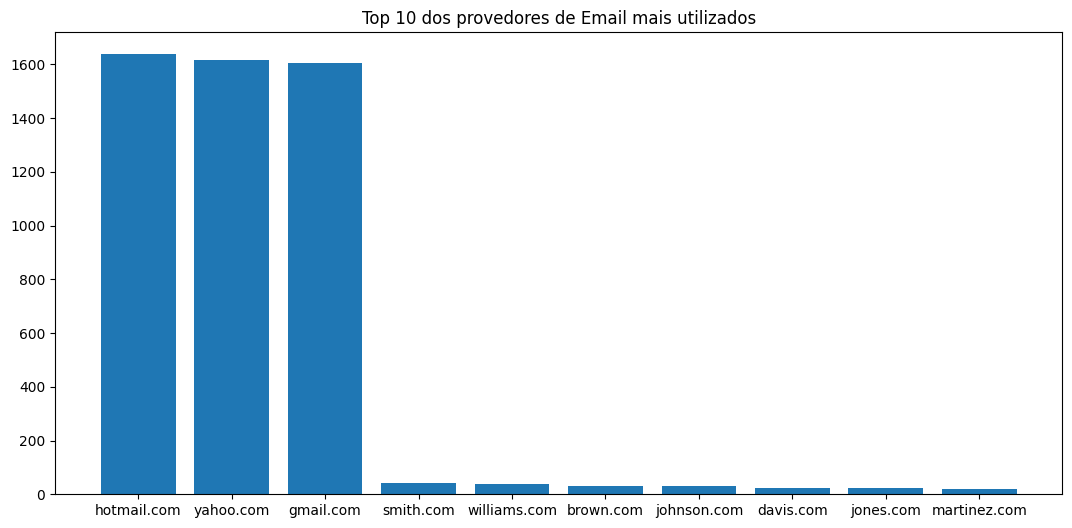

In [52]:
plt.figure(figsize=(13,6))
plt.bar(top_10.index, top_10.values)
#plt.xticks(rotation=90)
plt.title('Top 10 dos provedores de Email mais utilizados')
plt.show()

In [ ]:
#11) - Quais Browser são mais utilizados pelos nossos clientes?

In [93]:
dados['Browser Info'].value_counts().head(20)

Mozilla/5.0 (compatible; MSIE 9.0; Windows CE; Trident/4.1)         12
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/3.1)     12
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.0; Trident/3.0)     12
Mozilla/5.0 (compatible; MSIE 9.0; Windows 95; Trident/4.1)         12
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 5.01; Trident/5.0)    11
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.2; Trident/5.0)     11
Mozilla/5.0 (compatible; MSIE 8.0; Windows CE; Trident/5.0)         11
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0)     11
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/4.0)     11
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/5.0)     11
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0)     10
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.1; Trident/3.0)     10
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.1)     10
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 5.01; Trident/4.1)    10
Mozill

In [ ]:
#12) - Por ocupação como esta a estado de compra dos clientes?

In [76]:
mes_max = dados.groupby('Job')['Purchase Price'].sum().reset_index().sort_values(by='Purchase Price', ascending=False)
mes_max

,Job,Purchase Price
158,Dietitian,1605.30
325,Lawyer,1603.85
473,Purchasing manager,1577.97
589,"Therapist, art",1526.31
101,Clinical cytogeneticist,1495.92
...,...,...
379,Music therapist,327.50
8,Actuary,262.72
305,Information systems manager,241.42
352,Marketing executive,234.08


In [80]:
top_10_compra = mes_max.head(15)
top_10_compra

,Job,Purchase Price
158,Dietitian,1605.30
325,Lawyer,1603.85
473,Purchasing manager,1577.97
589,"Therapist, art",1526.31
101,Clinical cytogeneticist,1495.92
489,"Research officer, political party",1488.79
151,"Designer, jewellery",1482.20
312,Interior and spatial designer,1466.20
384,Network engineer,1421.73
531,Social researcher,1416.34


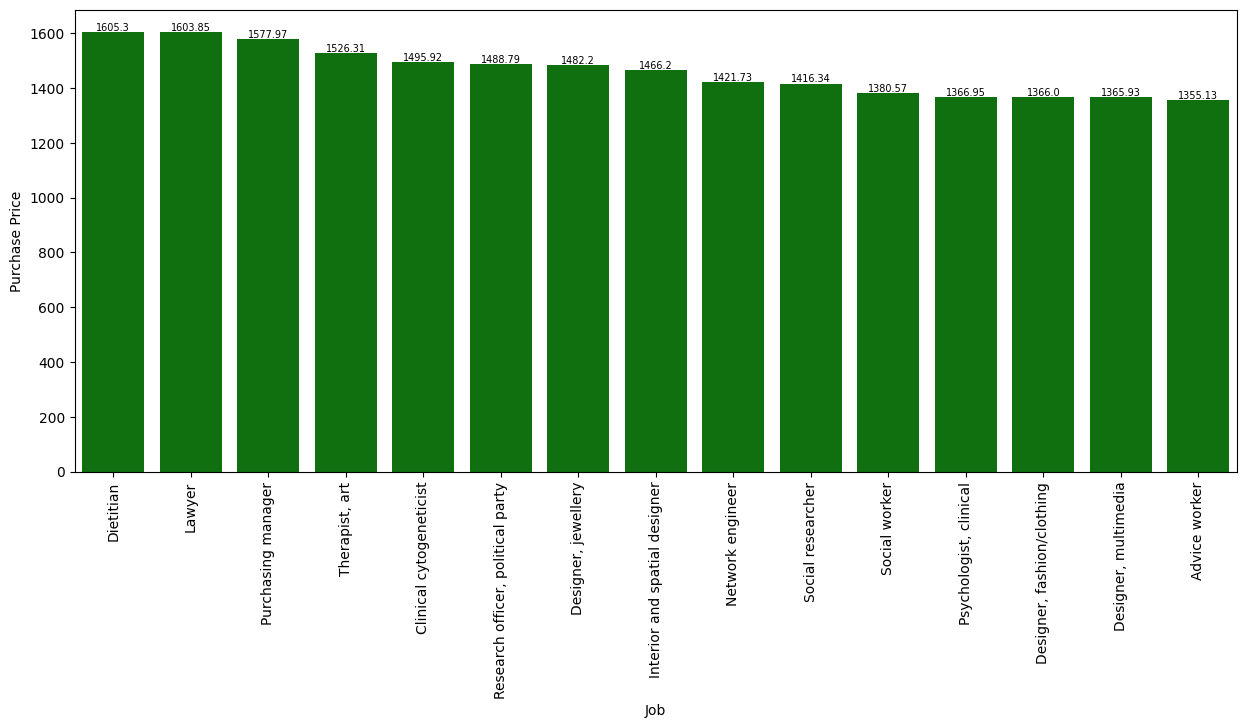

In [82]:
plt.figure(figsize=(15,6))
plot = sns.barplot(x='Job', y='Purchase Price', data =top_10_compra, color='g')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#13) - Demostre a quantidade de compra por Companhia considerando um top 20?

In [86]:
dados.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [104]:
comp_ling = dados.groupby('Company')['Purchase Price'].count().reset_index().sort_values(by='Purchase Price', ascending=False)
top_20_comp = comp_ling.head(20)
top_20_comp

,Company,Purchase Price
805,Brown Ltd,15
7164,Smith Group,15
7168,Smith PLC,13
7166,Smith LLC,13
8303,Williams LLC,12
7169,Smith and Sons,11
1724,Davis and Sons,11
7165,Smith Inc,10
802,Brown Group,10
3782,Johnson Ltd,10


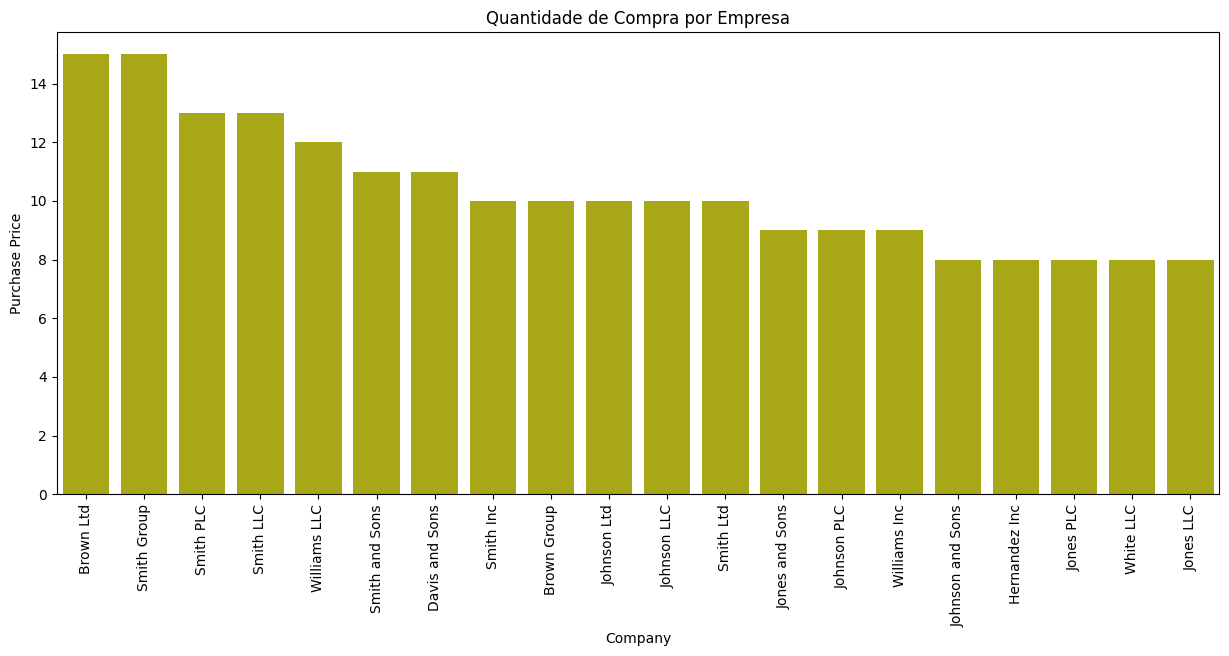

In [114]:
plt.figure(figsize=(15,6))
#sns.set_theme(style="whitegrid")
plot = sns.barplot(x='Company', y='Purchase Price', data =top_20_comp, color='y')
plt.xticks(rotation=90)
plt.title('Quantidade de Compra por Empresa')
plt.show()

In [ ]:
#14) - Demostre Somatorio de Compra por Companhia considerando um top 20?

In [111]:
compra_das_Emp = dados.groupby('Company')['Purchase Price'].sum().reset_index().sort_values(by='Purchase Price', ascending=False)
top_20_emp = compra_das_Emp.head(20)
top_20_emp

,Company,Purchase Price
805,Brown Ltd,796.38
8303,Williams LLC,723.63
7166,Smith LLC,637.92
7168,Smith PLC,601.37
3782,Johnson Ltd,600.61
7164,Smith Group,592.54
3783,Johnson PLC,567.33
1724,Davis and Sons,560.09
802,Brown Group,522.72
803,Brown Inc,520.41


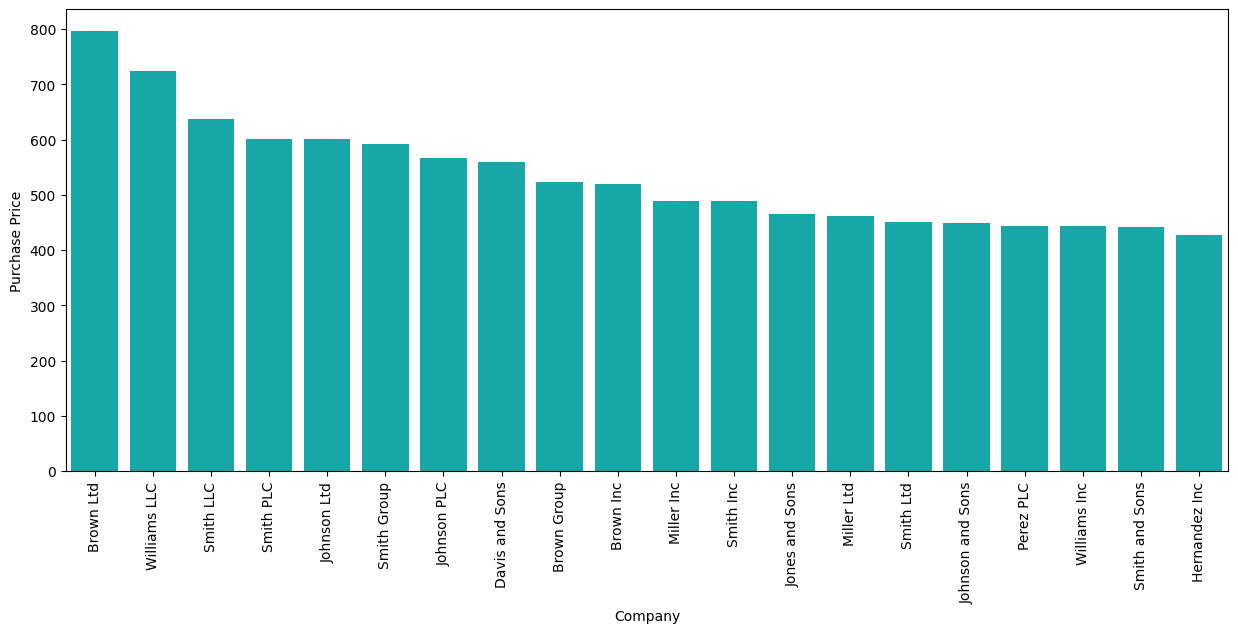

In [113]:
plt.figure(figsize=(15,6))
plot = sns.barplot(x='Company', y='Purchase Price', data =top_20_emp, color='c')
plt.xticks(rotation=90)
plt.show()